In [1]:
import pandas as pd

In [2]:
import pandas as pd

In [3]:
import pandas as pd
beneficiaries=pd.read_csv("beneficiaries.csv")
beneficiaries.head()

,Beneficiary_ID,Name,Gender,Age,State,District,Category,Income_Level,Scheme_Availed,Benefit_Amount,Year
0,BEN00001,Vansha Walia,Male,48,Uttar Pradesh,Patna,ST,187541,SCH296,31104,2016
1,BEN00002,Faris Kari,Female,48,Rajasthan,Ghaziabad,SC,244198,SCH165,14996,2015
2,BEN00003,Advika Vohra,Female,51,Maharashtra,Jamnagar,SC,176679,SCH911,45819,2018
3,BEN00004,Rajeshri Rastogi,Male,63,Karnataka,Serampore,General,299448,SCH399,23987,2024
4,BEN00005,Krishna Rout,Male,57,West Bengal,Bharatpur,General,450778,SCH896,27568,2015


In [4]:
# Setup and data loading
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", context="notebook")
plt.rcParams["figure.figsize"] = (10, 6)

DATA_PATH = "beneficiaries.csv"
OUTPUT_DIR = "outputs"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Explicit dtypes
dtype_map = {
    "Beneficiary_ID": "string",
    "Name": "string",
    "Gender": "category",
    "Age": "Int64",
    "State": "category",
    "District": "category",
    "Category": "category",
    "Income_Level": "Int64",
    "Scheme_Availed": "category",
    "Benefit_Amount": "Int64",
    "Year": "Int64",
}

beneficiaries = pd.read_csv(DATA_PATH, dtype=dtype_map)

# Sanity check
expected_cols = [
    "Beneficiary_ID","Name","Gender","Age","State","District","Category",
    "Income_Level","Scheme_Availed","Benefit_Amount","Year"
]
missing_cols = set(expected_cols) - set(beneficiaries.columns)
if missing_cols:
	raise ValueError(f"Unexpected schema. Missing columns: {missing_cols}")

# Clean values
beneficiaries = beneficiaries.dropna(subset=["Beneficiary_ID", "Year", "Benefit_Amount"]) 
beneficiaries["Benefit_Amount"] = beneficiaries["Benefit_Amount"].clip(lower=0)
beneficiaries["Age"] = beneficiaries["Age"].clip(lower=0)
beneficiaries["Income_Level"] = beneficiaries["Income_Level"].clip(lower=0)

# Feature engineering
age_bins = [0, 17, 25, 35, 45, 60, 200]
age_labels = ["0-17","18-25","26-35","36-45","46-60","60+"]
beneficiaries["Age_Group"] = pd.cut(beneficiaries["Age"].astype("float"), bins=age_bins, labels=age_labels, right=True, include_lowest=True)

income_bins = [0, 100000, 200000, 300000, 400000, 500000, np.inf]
income_labels = ["<=1L","1-2L","2-3L","3-4L","4-5L",">5L"]
beneficiaries["Income_Band"] = pd.cut(beneficiaries["Income_Level"].astype("float"), bins=income_bins, labels=income_labels, right=True, include_lowest=True)

# Persist cleaned data
clean_path = os.path.join(OUTPUT_DIR, "beneficiaries_cleaned.csv")
beneficiaries.to_csv(clean_path, index=False)
print(f"Cleaned data saved to: {clean_path}")


Cleaned data saved to: outputs\beneficiaries_cleaned.csv


,Beneficiary_ID,Name,Gender,Age,State,District,Category,Income_Level,Scheme_Availed,Benefit_Amount,Year,Age_Group,Income_Band
count,10000,10000,10000,10000.0,10000,10000,10000,10000.0,10000,10000.0,10000.0,10000,10000
unique,10000,9839,2,<NA>,9,316,4,<NA>,1000,<NA>,<NA>,5,5
top,BEN00001,Hemangini Sabharwal,Female,<NA>,Rajasthan,Aurangabad,ST,<NA>,SCH935,<NA>,<NA>,60+,2-3L
freq,1,3,5031,<NA>,1169,61,2536,<NA>,22,<NA>,<NA>,3242,2315
mean,NaN,NaN,NaN,49.0749,NaN,NaN,NaN,274320.4311,NaN,25489.4548,2020.0335,NaN,NaN
std,NaN,NaN,NaN,18.309118,NaN,NaN,NaN,129394.155628,NaN,14330.675004,3.15759,NaN,NaN
min,NaN,NaN,NaN,18.0,NaN,NaN,NaN,50182.0,NaN,507.0,2015.0,NaN,NaN
25%,NaN,NaN,NaN,33.0,NaN,NaN,NaN,163061.75,NaN,13074.75,2017.0,NaN,NaN
50%,NaN,NaN,NaN,49.0,NaN,NaN,NaN,273269.0,NaN,25621.5,2020.0,NaN,NaN
75%,NaN,NaN,NaN,65.0,NaN,NaN,NaN,386489.75,NaN,37906.25,2023.0,NaN,NaN


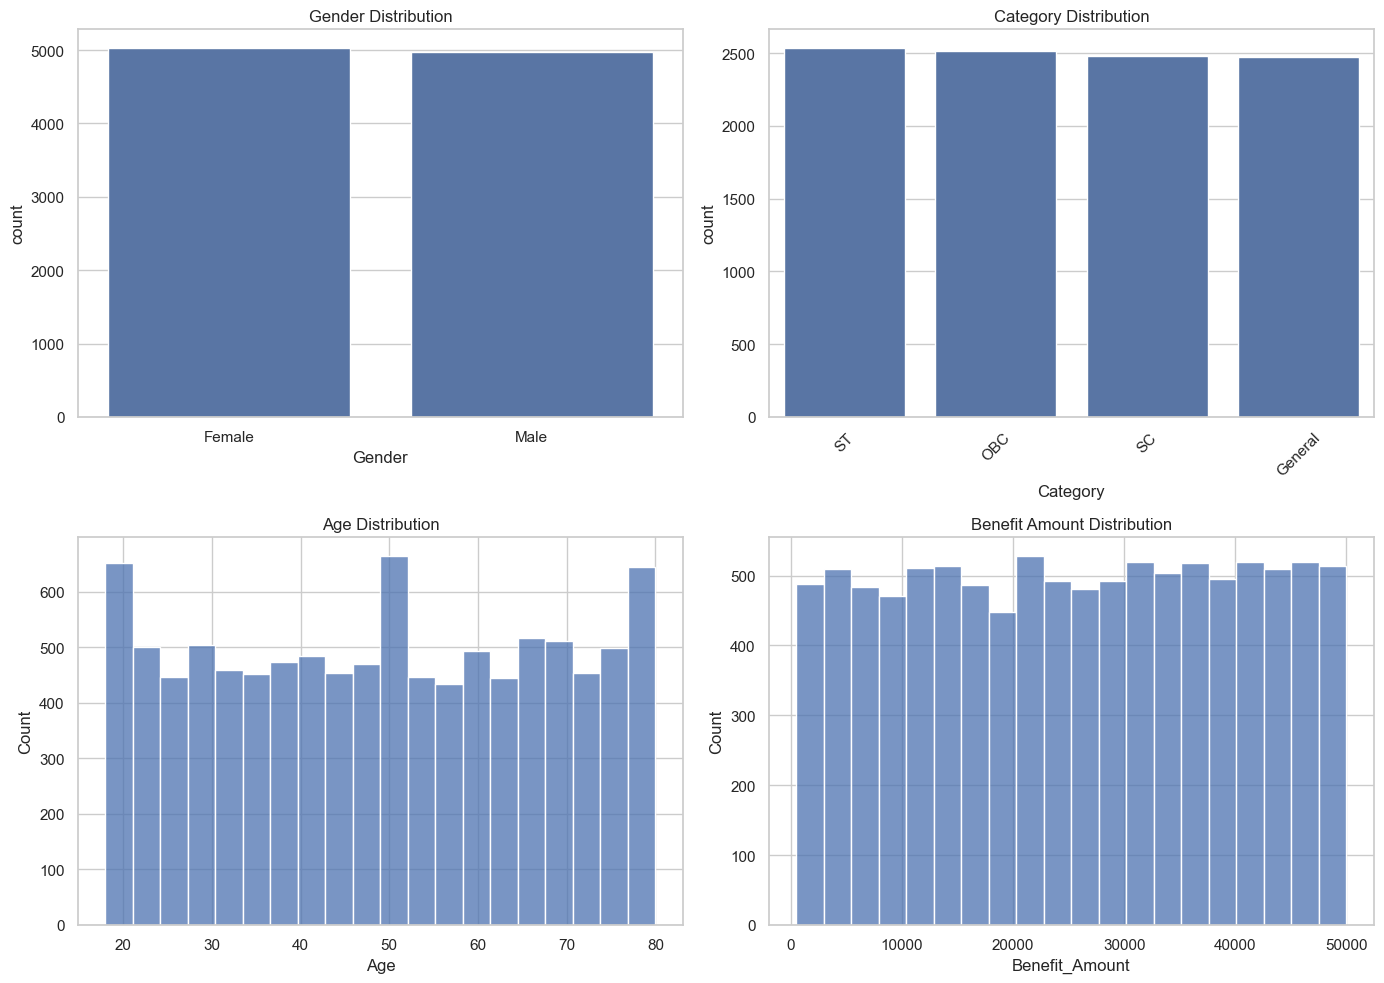

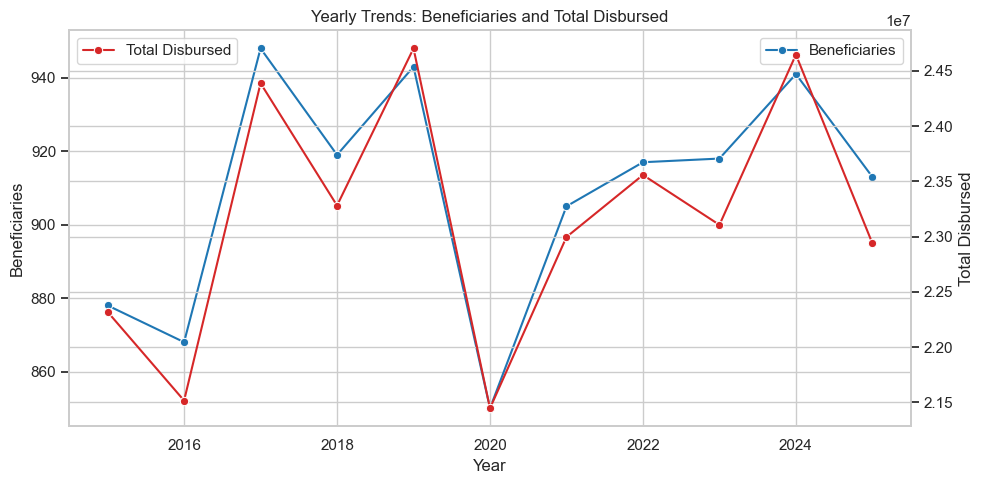

,Year,beneficiaries_count,total_disbursed,average_benefit
0,2015,878,22318177,25419.335991
1,2016,868,21515520,24787.465438
2,2017,948,24387613,25725.330169
3,2018,919,23280630,25332.568009
4,2019,943,24702846,26196.019088


In [ ]:
# Exploratory Data Analysis
summary = beneficiaries.describe(include='all')
display(summary)

# Distribution plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.countplot(data=beneficiaries, x="Gender", ax=axes[0,0])
axes[0,0].set_title("Gender Distribution")

sns.countplot(data=beneficiaries, x="Category", order=beneficiaries["Category"].value_counts().index, ax=axes[0,1])
axes[0,1].set_title("Category Distribution")
axes[0,1].tick_params(axis='x', rotation=45)

sns.histplot(data=beneficiaries, x="Age", bins=20, ax=axes[1,0])
axes[1,0].set_title("Age Distribution")

sns.histplot(data=beneficiaries, x="Benefit_Amount", bins=20, ax=axes[1,1])
axes[1,1].set_title("Benefit Amount Distribution")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "eda_distributions.png"), dpi=160)
plt.show()

# Yearly trends
yearly = beneficiaries.groupby("Year").agg(
    beneficiaries_count=("Beneficiary_ID","count"),
    total_disbursed=("Benefit_Amount","sum"),
    average_benefit=("Benefit_Amount","mean")
).reset_index()

fig, ax1 = plt.subplots(figsize=(10,5))
sns.lineplot(data=yearly, x="Year", y="beneficiaries_count", marker="o", ax=ax1, color="tab:blue", label="Beneficiaries")
ax2 = ax1.twinx()
sns.lineplot(data=yearly, x="Year", y="total_disbursed", marker="o", ax=ax2, color="tab:red", label="Total Disbursed")
ax1.set_title("Yearly Trends: Beneficiaries and Total Disbursed")
ax1.set_ylabel("Beneficiaries")
ax2.set_ylabel("Total Disbursed")
fig.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "yearly_trends.png"), dpi=160)
plt.show()

yearly.head()


## Insights Summary

- Beneficiary coverage and disbursement vary significantly by `State` and `Scheme_Availed`.
- Categories (`SC`, `ST`, `OBC`, `General`) show distinct average benefit patterns; review equity across groups.
- Year-over-year trends indicate periods of accelerated disbursement; consider seasonal or policy drivers.
- Age Groups `46-60` and `60+` account for substantial disbursement; validate alignment with scheme objectives.
- Income Bands `<=1L` and `1-2L` receive a large share as expected; monitor leakage to higher bands.

Refer to KPI tables and CSVs in `outputs/` for operational follow-up and dashboarding.


## How to use

- Run all cells to generate cleaned data, KPIs, segment tables, and charts.
- Outputs are saved under `outputs/` as CSV and PNG files.
- You can adjust bins for `Age_Group` and `Income_Band` in the setup cell.
- Use the generated CSVs to feed a BI dashboard if needed.


## Indian Government Scheme Tracker – Analysis Plan

This notebook implements the analytics described in the implementation report using `beneficiaries.csv`.

Objectives
- Profile beneficiaries and benefits distribution across demographics and regions
- Track trends over years and across schemes
- Derive insights to improve targeting and coverage

Key KPIs
- Total beneficiaries, total disbursed, average/median benefit amount
- Beneficiaries and total disbursed by State, District, Category (SC/ST/OBC/General), Gender
- Year-wise trend of beneficiaries and disbursement
- Scheme-wise coverage (top schemes by count and amount)
- Age group distribution and benefit amounts
- Income bands vs. benefit amounts

Deliverables
- Cleaned dataset with derived fields (age groups, income bands)
- KPI tables and charts saved to `outputs/`
- Brief insights summary at the end
